In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

from src.data_generator import *
from src.geomedian import GeometricMedian
from src.utils import *
import torch
from geom_median.torch import compute_geometric_median

In [6]:
def test(n=1000, d=10, eps=0.1):
    data = generate_data((n, d), 0.2)
    gm = GeometricMedian(data)
    s1 = time.time()
    gm.AccurateMedianV2(eps, verbose=1)
    e1 = time.time()
    s2 = time.time()
    shit = torch.Tensor.numpy(compute_geometric_median(torch.from_numpy(data)).median)
    e2 = time.time()
    print(f"Ours: {e1-s1:.03f} seconds, final cost of {calc_f(data, gm.medians[-1])}")
    print(f"Against: {e2-s2:.03f} seconds, final cost of {calc_f(data, shit)}")
    return gm, shit, data

In [4]:
gm, shit, A = test(n=1000, d=10)

processing data... 0/10
initializing...
Completed 0/429 iterations. cost is 5987.140662920996
Completed 42/429 iterations. cost is 5987.140662920996
Completed 84/429 iterations. cost is 5986.792848104191
Completed 126/429 iterations. cost is 5984.696105147788
Completed 168/429 iterations. cost is 5973.821588861637
Completed 210/429 iterations. cost is 5920.62120542821
Completed 252/429 iterations. cost is 5716.859941488763
Completed 294/429 iterations. cost is 5285.863430949138
Completed 336/429 iterations. cost is 4886.840361883135
Completed 378/429 iterations. cost is 4723.069703572421
Completed 420/429 iterations. cost is 4687.633575300862
Ours: 169.547 seconds, final cost of 4685.613045074033
Against: 0.385 seconds, final cost of 4680.777002004459


In [5]:
gm, shit, A = test(n=10000, d=10)

processing data... 0/10
initializing...
Completed 0/487 iterations. cost is 59965.389400370055
Completed 48/487 iterations. cost is 59965.389400370055
Completed 96/487 iterations. cost is 59965.389400370055
Completed 144/487 iterations. cost is 59965.389400370055
Completed 192/487 iterations. cost is 59963.161909910064
Completed 240/487 iterations. cost is 59943.166609762986
Completed 288/487 iterations. cost is 59811.06759312966
Completed 336/487 iterations. cost is 59019.96000789653
Completed 384/487 iterations. cost is 55857.22508708488
Completed 432/487 iterations. cost is 50645.28885630089
Completed 480/487 iterations. cost is 47691.03644281188
Ours: 225.989 seconds, final cost of 47529.96666403892
Against: 3.558 seconds, final cost of 46933.72927450511


ValueError: not enough values to unpack (expected 3, got 2)

In [7]:
gm, shit, A = test(n=10000, d=100)

processing data... 0/100
processing data... 50/100
initializing...
Completed 0/487 iterations. cost is 264570.44837267126
Completed 48/487 iterations. cost is 264570.44837267126
Completed 96/487 iterations. cost is 264570.2355413998
Completed 144/487 iterations. cost is 264568.2234410824
Completed 192/487 iterations. cost is 264554.7124897818
Completed 240/487 iterations. cost is 264464.6091240642
Completed 288/487 iterations. cost is 263870.9157980656
Completed 336/487 iterations. cost is 260276.2829534537
Completed 384/487 iterations. cost is 245466.80270809305
Completed 432/487 iterations. cost is 220238.05057661908
Completed 480/487 iterations. cost is 204542.43231078488
Ours: 1775.426 seconds, final cost of 203583.9700527825
Against: 2.814 seconds, final cost of 199849.06617287538


In [63]:
n, d = 100, 20
A = generate_data((n, d), 0.2)

In [64]:
gm = GeometricMedian(A)

starting 0'th iteration!


At AccurateMedian
AccurateMedian k is 6766
iteration 100/6766
iteration 200/6766
iteration 300/6766
iteration 400/6766
iteration 500/6766
iteration 600/6766
iteration 700/6766
iteration 800/6766
iteration 900/6766
iteration 1000/6766


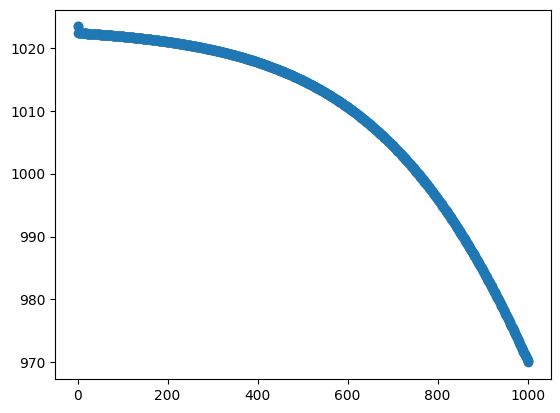

iteration 1100/6766
iteration 1200/6766
iteration 1300/6766
iteration 1400/6766
iteration 1500/6766
iteration 1600/6766
iteration 1700/6766
iteration 1800/6766
iteration 1900/6766
iteration 2000/6766


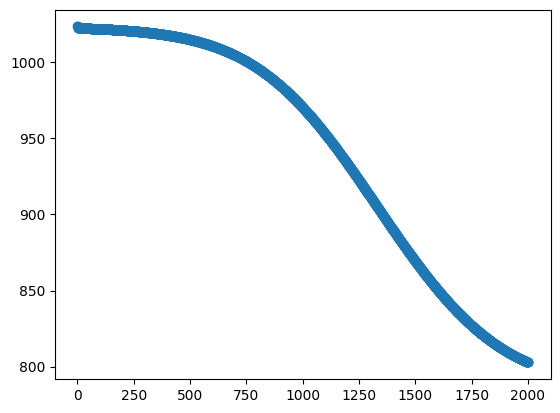

iteration 2100/6766
iteration 2200/6766
iteration 2300/6766
iteration 2400/6766


KeyboardInterrupt: 

In [65]:
gm.AccurateMedian(0.1)

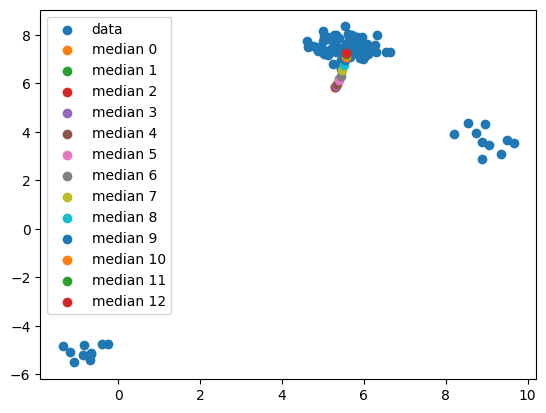

In [94]:
plot_data(A[:, 18:20], [meds[i][18:20] for i in range(0, meds.shape[0], 200)], show_data=True)

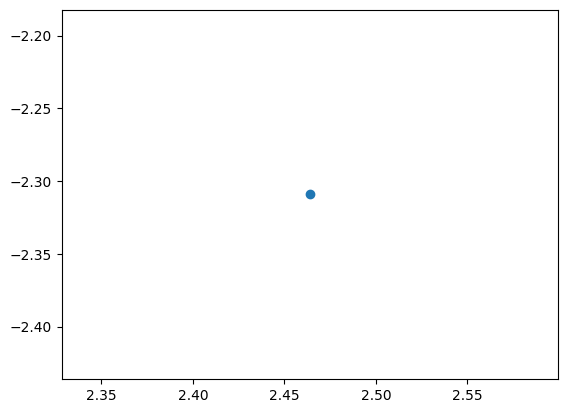

In [49]:
tmp = np.array(gm.medians)
for i in range(1):
    # plt.scatter(gm.medians[i][0], gm.medians[i][1], s=1/(49*t_i(gm.f_star, i)))
    plt.scatter(gm.medians[i][3], gm.medians[i][4])
    # plt.quiver(gm.medians[i][0], gm.medians[i][1], gm.medians[i+1][0], gm.medians[i+1][1])

In [67]:
calc_f(A, gm.medians[-1])

789.3196813323574

In [77]:
meds = np.squeeze(np.array(gm.medians))

In [74]:
np.corrcoef(np.squeeze(meds[:, 3]), np.squeeze(meds[:, 4]))

array([[1.        , 0.70415238],
       [0.70415238, 1.        ]])

In [80]:
np.corrcoef(meds, rowvar=False)

array([[ 1.        , -0.96200797, -0.98738061, -0.9451136 , -0.8975025 ,
         0.94601206, -0.98884641, -0.97412069, -0.9853456 ,  0.99435828,
        -0.99118231,  0.99987923,  0.96518677, -0.98321626,  0.95993252,
         0.99407833,  0.98709333, -0.98276024, -0.94140046, -0.98153063],
       [-0.96200797,  1.        ,  0.90672313,  0.99841215,  0.74301632,
        -0.99847778,  0.99194052,  0.9988202 ,  0.9944783 , -0.93337318,
         0.98969677, -0.96602684, -0.99992923,  0.99567193, -0.99994313,
        -0.98597163, -0.99331234,  0.99589955,  0.99771985,  0.99646985],
       [-0.98738061,  0.90672313,  1.        ,  0.88157742,  0.95578253,
        -0.88275632,  0.95284325,  0.92613044,  0.94596978, -0.99589643,
         0.957761  , -0.98490367, -0.91167599,  0.94199019, -0.90363017,
        -0.96439145, -0.94934885,  0.9411546 ,  0.87624647,  0.93892417],
       [-0.9451136 ,  0.99841215,  0.88157742,  1.        ,  0.70415238,
        -0.99985501,  0.98323675,  0.9945076 ,  

In [76]:
meds.shape

(2476, 20, 1)

In [58]:
meds[:, 0].shape

(2232, 1)

In [50]:
gm.f_star

392.65613661791497

In [5]:
f"{gm.trivial_calls_minimize_local_center}/{gm.total_calls_minimize_local_center} of minimize_local_center calls resulted in the trivial solution"

'0/0 of minimize_local_center calls resulted in the trivial solution'

In [8]:
calc_f(A, gm.medians[-1])

308.9042991185375

In [6]:
calc_f(A, gm.medians[-1])

308.2491121231038

In [68]:
res_big = compute_geometric_median(torch.from_numpy(A))

In [69]:
res_res = torch.Tensor.numpy(res_big.median)

In [71]:
calc_f(A, gm.medians[-1])

789.3196813323574

In [72]:
calc_f(A, res_res)

787.6869995481746

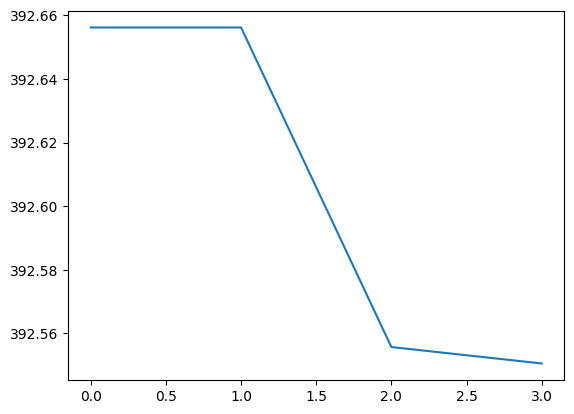

In [11]:
plt.plot([calc_f(A, gm.medians[i]) for i in range(len(gm.medians))])

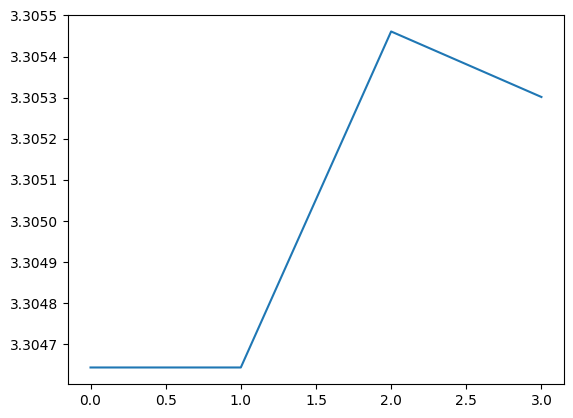

In [12]:
plt.plot([gm.medians[i][1] for i in range(len(gm.medians))])

In [13]:
plot_data(A, [gm.medians[0], gm.medians[-1], res_res], show_data=True)

ValueError: Required d<=3

In [4]:
n, d = 100, 5
B = generate_data((n, d), 0.2)

In [5]:
gm_big = GeometricMedian(B)

starting 0'th iteration!


At AccurateMedian
AccurateMedian k is 6766
iteration 10/6766
iteration 20/6766
iteration 30/6766
iteration 40/6766
iteration 50/6766
iteration 60/6766
iteration 70/6766
iteration 80/6766
iteration 90/6766
iteration 100/6766
iteration 110/6766
iteration 120/6766
iteration 130/6766
iteration 140/6766
iteration 150/6766
iteration 160/6766
iteration 170/6766
iteration 180/6766
iteration 190/6766
iteration 200/6766
iteration 210/6766
iteration 220/6766
iteration 230/6766
iteration 240/6766
iteration 250/6766
iteration 260/6766
iteration 270/6766
iteration 280/6766
iteration 290/6766
iteration 300/6766
iteration 310/6766
iteration 320/6766
iteration 330/6766
iteration 340/6766
iteration 350/6766
iteration 360/6766
iteration 370/6766
iteration 380/6766
iteration 390/6766
iteration 400/6766
iteration 410/6766
iteration 420/6766
iteration 430/6766
iteration 440/6766
iteration 450/6766
iteration 460/6766
iteration 470/6766
iteration 480/6766
iteration 490/6766
iteration 500/6766
iteration 510/67

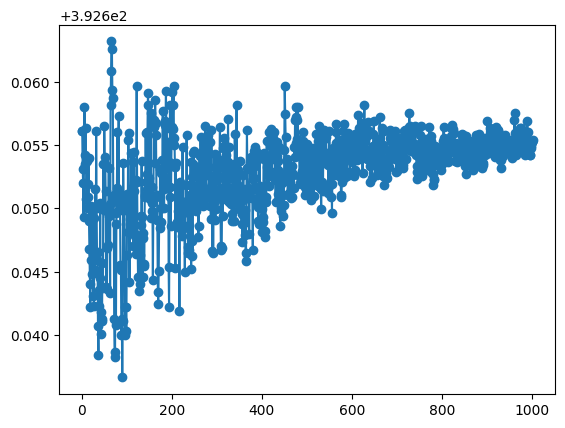

iteration 1010/6766
iteration 1020/6766
iteration 1030/6766
iteration 1040/6766
iteration 1050/6766
iteration 1060/6766
iteration 1070/6766
iteration 1080/6766
iteration 1090/6766
iteration 1100/6766
iteration 1110/6766
iteration 1120/6766
iteration 1130/6766
iteration 1140/6766
iteration 1150/6766
iteration 1160/6766
iteration 1170/6766
iteration 1180/6766
iteration 1190/6766
iteration 1200/6766
iteration 1210/6766
iteration 1220/6766
iteration 1230/6766
iteration 1240/6766
iteration 1250/6766
iteration 1260/6766
iteration 1270/6766
iteration 1280/6766
iteration 1290/6766
iteration 1300/6766
iteration 1310/6766
iteration 1320/6766
iteration 1330/6766
iteration 1340/6766
iteration 1350/6766
iteration 1360/6766
iteration 1370/6766
iteration 1380/6766
iteration 1390/6766
iteration 1400/6766
iteration 1410/6766
iteration 1420/6766
iteration 1430/6766
iteration 1440/6766
iteration 1450/6766
iteration 1460/6766
iteration 1470/6766
iteration 1480/6766
iteration 1490/6766
iteration 1500/6766


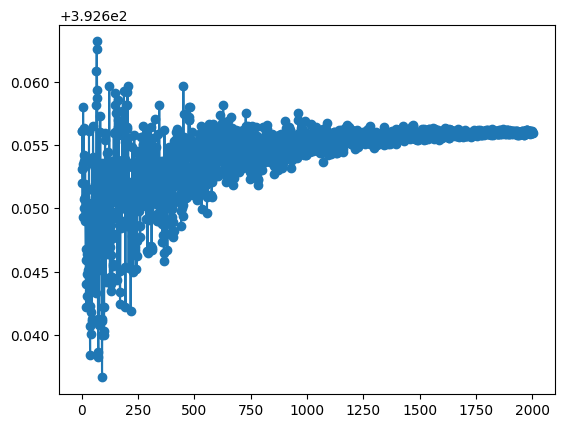

iteration 2010/6766
iteration 2020/6766
iteration 2030/6766
iteration 2040/6766
iteration 2050/6766
iteration 2060/6766
iteration 2070/6766
iteration 2080/6766
iteration 2090/6766
iteration 2100/6766
iteration 2110/6766
iteration 2120/6766
iteration 2130/6766
iteration 2140/6766
iteration 2150/6766
iteration 2160/6766
iteration 2170/6766
iteration 2180/6766
iteration 2190/6766
iteration 2200/6766
iteration 2210/6766
iteration 2220/6766
iteration 2230/6766
iteration 2240/6766
iteration 2250/6766
iteration 2260/6766
iteration 2270/6766
iteration 2280/6766
iteration 2290/6766
iteration 2300/6766
iteration 2310/6766
iteration 2320/6766
iteration 2330/6766
iteration 2340/6766
iteration 2350/6766
iteration 2360/6766
iteration 2370/6766
iteration 2380/6766
iteration 2390/6766
iteration 2400/6766
iteration 2410/6766
iteration 2420/6766
iteration 2430/6766
iteration 2440/6766
iteration 2450/6766
iteration 2460/6766
iteration 2470/6766
iteration 2480/6766
iteration 2490/6766
iteration 2500/6766


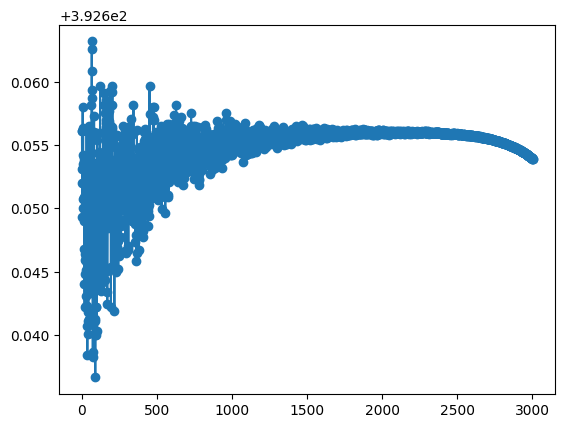

iteration 3010/6766
iteration 3020/6766
iteration 3030/6766
iteration 3040/6766
iteration 3050/6766
iteration 3060/6766
iteration 3070/6766
iteration 3080/6766
iteration 3090/6766
iteration 3100/6766
iteration 3110/6766
iteration 3120/6766
iteration 3130/6766
iteration 3140/6766
iteration 3150/6766
iteration 3160/6766
iteration 3170/6766
iteration 3180/6766
iteration 3190/6766
iteration 3200/6766
iteration 3210/6766
iteration 3220/6766
iteration 3230/6766
iteration 3240/6766
iteration 3250/6766
iteration 3260/6766
iteration 3270/6766
iteration 3280/6766
iteration 3290/6766
iteration 3300/6766
iteration 3310/6766
iteration 3320/6766
iteration 3330/6766
iteration 3340/6766
iteration 3350/6766
iteration 3360/6766
iteration 3370/6766
iteration 3380/6766
iteration 3390/6766
iteration 3400/6766
iteration 3410/6766
iteration 3420/6766
iteration 3430/6766
iteration 3440/6766
iteration 3450/6766
iteration 3460/6766
iteration 3470/6766
iteration 3480/6766
iteration 3490/6766
iteration 3500/6766


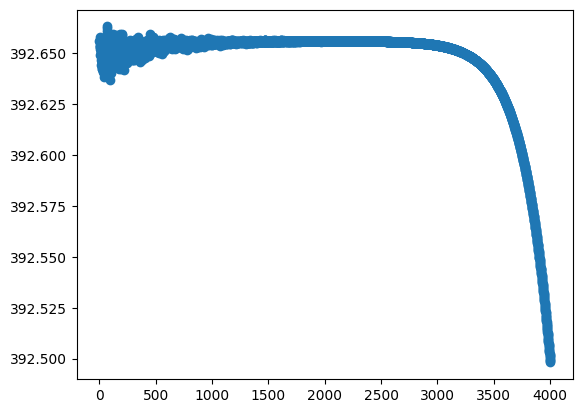

iteration 4010/6766
iteration 4020/6766
iteration 4030/6766
iteration 4040/6766
iteration 4050/6766
iteration 4060/6766
iteration 4070/6766
iteration 4080/6766
iteration 4090/6766
iteration 4100/6766
iteration 4110/6766
iteration 4120/6766
iteration 4130/6766
iteration 4140/6766
iteration 4150/6766
iteration 4160/6766
iteration 4170/6766
iteration 4180/6766
iteration 4190/6766
iteration 4200/6766
iteration 4210/6766
iteration 4220/6766
iteration 4230/6766
iteration 4240/6766
iteration 4250/6766
iteration 4260/6766
iteration 4270/6766
iteration 4280/6766
iteration 4290/6766
iteration 4300/6766
iteration 4310/6766
iteration 4320/6766
iteration 4330/6766
iteration 4340/6766
iteration 4350/6766
iteration 4360/6766
iteration 4370/6766
iteration 4380/6766
iteration 4390/6766
iteration 4400/6766
iteration 4410/6766
iteration 4420/6766
iteration 4430/6766
iteration 4440/6766
iteration 4450/6766
iteration 4460/6766
iteration 4470/6766
iteration 4480/6766
iteration 4490/6766
iteration 4500/6766


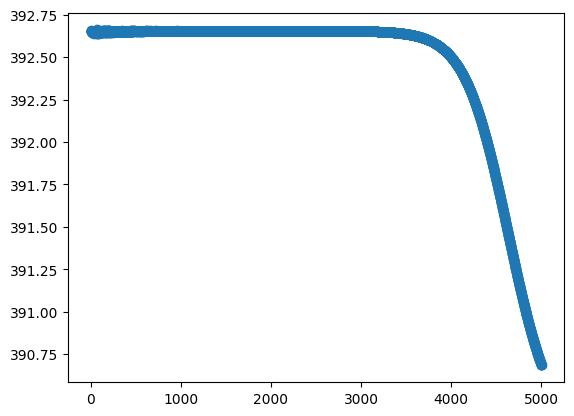

iteration 5010/6766
iteration 5020/6766
iteration 5030/6766
iteration 5040/6766
iteration 5050/6766
iteration 5060/6766
iteration 5070/6766
iteration 5080/6766
iteration 5090/6766
iteration 5100/6766
iteration 5110/6766
iteration 5120/6766
iteration 5130/6766
iteration 5140/6766
iteration 5150/6766
iteration 5160/6766
iteration 5170/6766
iteration 5180/6766
iteration 5190/6766
iteration 5200/6766
iteration 5210/6766
iteration 5220/6766
iteration 5230/6766
iteration 5240/6766
iteration 5250/6766
iteration 5260/6766
iteration 5270/6766
iteration 5280/6766
iteration 5290/6766
iteration 5300/6766
iteration 5310/6766
iteration 5320/6766
iteration 5330/6766
iteration 5340/6766
iteration 5350/6766
iteration 5360/6766
iteration 5370/6766
iteration 5380/6766
iteration 5390/6766
iteration 5400/6766
iteration 5410/6766
iteration 5420/6766
iteration 5430/6766
iteration 5440/6766
iteration 5450/6766
iteration 5460/6766
iteration 5470/6766
iteration 5480/6766
iteration 5490/6766
iteration 5500/6766


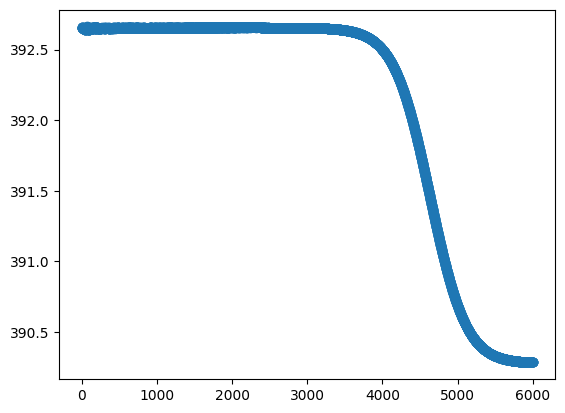

iteration 6010/6766
iteration 6020/6766
iteration 6030/6766
iteration 6040/6766
iteration 6050/6766
iteration 6060/6766
iteration 6070/6766
iteration 6080/6766
iteration 6090/6766
iteration 6100/6766
iteration 6110/6766
iteration 6120/6766
iteration 6130/6766
iteration 6140/6766
iteration 6150/6766
iteration 6160/6766
iteration 6170/6766
iteration 6180/6766
iteration 6190/6766
iteration 6200/6766
iteration 6210/6766
iteration 6220/6766
iteration 6230/6766
iteration 6240/6766
iteration 6250/6766
iteration 6260/6766
iteration 6270/6766
iteration 6280/6766
iteration 6290/6766
iteration 6300/6766
iteration 6310/6766
iteration 6320/6766
iteration 6330/6766
iteration 6340/6766
iteration 6350/6766
iteration 6360/6766
iteration 6370/6766
iteration 6380/6766
iteration 6390/6766
iteration 6400/6766
iteration 6410/6766
iteration 6420/6766
iteration 6430/6766
iteration 6440/6766
iteration 6450/6766
iteration 6460/6766
iteration 6470/6766
iteration 6480/6766
iteration 6490/6766
iteration 6500/6766


array([[ 1.46494145],
       [ 3.1424176 ],
       [ 2.40495213],
       [ 2.30172969],
       [-2.47147239]])

In [8]:
gm_big.AccurateMedian(0.1)

In [9]:
f"{gm_big.trivial_calls_minimize_local_center}/{gm_big.total_calls_minimize_local_center} of minimize_local_center calls resulted in the trivial solution"

'2570449/2570449 of minimize_local_center calls resulted in the trivial solution'

In [10]:
calc_f(B, gm_big.medians[0])

392.65613661791497

In [11]:
calc_f(B, gm_big.medians[-1])

390.2781462748996

In [12]:
res_big = compute_geometric_median(torch.from_numpy(B))

In [13]:
res_res = torch.Tensor.numpy(res_big.median)

In [14]:
calc_f(B, res_res)

308.24907035829165

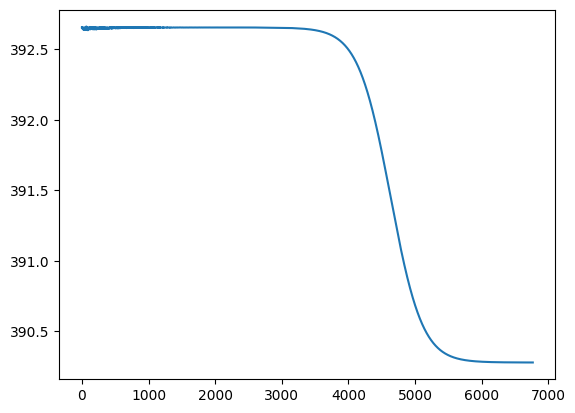

In [15]:
plt.plot([calc_f(B, gm_big.medians[i]) for i in range(len(gm_big.medians))])

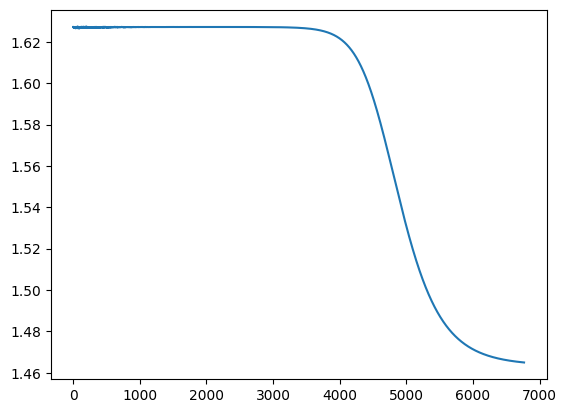

In [18]:
plt.plot([gm_big.medians[i][0] for i in range(len(gm_big.medians))])

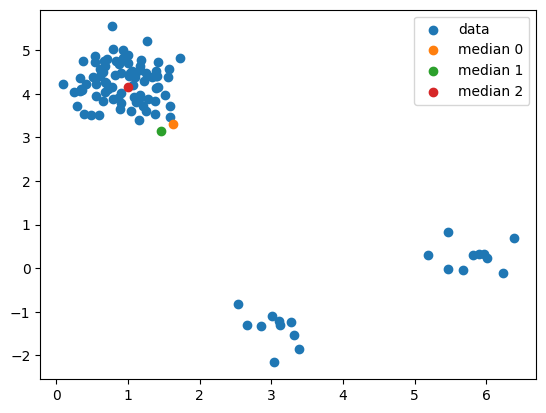

In [19]:
plot_data(B[:, :2], [gm_big.medians[0][:2], gm_big.medians[-1][:2], res_res[:2]], show_data=True)

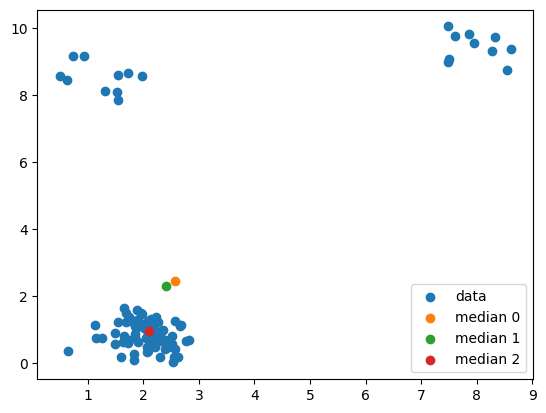

In [20]:
plot_data(B[:, 2:4], [gm_big.medians[0][2:4], gm_big.medians[-1][2:4], res_res[2:4]], show_data=True)

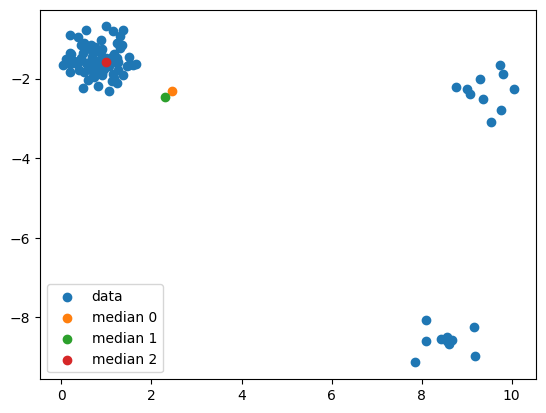

In [21]:
plot_data(B[:, 3:], [gm_big.medians[0][3:], gm_big.medians[-1][3:], res_res[3:]], show_data=True)

## another test, same params as original

In [6]:
n, d = 1000, 2
C = generate_data((n, d), 0.2)

In [7]:
gm3 = GeometricMedian(C)

starting 0'th iteration!


In [8]:
gm3.AccurateMedian(0.1)

At AccurateMedian
AccurateMedian k is 7826
iteration 10/7826
iteration 20/7826
iteration 30/7826
iteration 40/7826
iteration 50/7826
iteration 60/7826
iteration 70/7826
iteration 80/7826
iteration 90/7826
iteration 100/7826
iteration 110/7826
iteration 120/7826
iteration 130/7826
iteration 140/7826
iteration 150/7826
iteration 160/7826
iteration 170/7826
iteration 180/7826
iteration 190/7826
iteration 200/7826
iteration 210/7826
iteration 220/7826
iteration 230/7826
iteration 240/7826
iteration 250/7826
iteration 260/7826
iteration 270/7826
iteration 280/7826
iteration 290/7826
iteration 300/7826
iteration 310/7826
iteration 320/7826
iteration 330/7826
iteration 340/7826
iteration 350/7826
iteration 360/7826
iteration 370/7826
iteration 380/7826
iteration 390/7826
iteration 400/7826
iteration 410/7826
iteration 420/7826
iteration 430/7826
iteration 440/7826
iteration 450/7826
iteration 460/7826
iteration 470/7826
iteration 480/7826
iteration 490/7826
iteration 500/7826
iteration 510/78

array([[1.05048786],
       [4.04640917]])

In [9]:
f"{gm3.trivial_calls_minimize_local_center}/{gm3.total_calls_minimize_local_center} of minimize_local_center calls resulted in the trivial solution"

'2765182/2765182 of minimize_local_center calls resulted in the trivial solution'

In [10]:
calc_f(C, gm3.medians[0])

1106.4257826943135

In [11]:
calc_f(C, gm3.medians[-1])

1051.3006547808664

In [12]:
res_big = compute_geometric_median(torch.from_numpy(C))

In [13]:
res_res = torch.Tensor.numpy(res_big.median)

In [17]:
calc_f(C, res_res)

1026.3354357589724

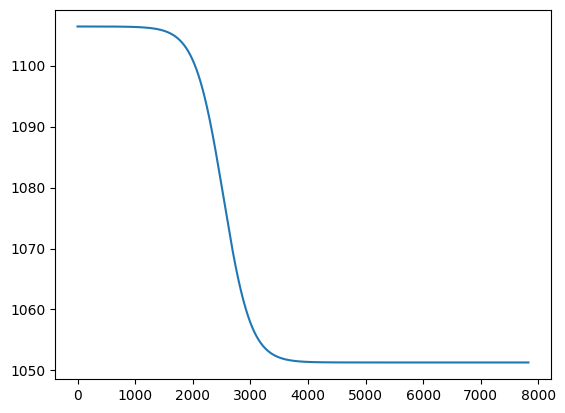

In [18]:
plt.plot([calc_f(C, gm3.medians[i]) for i in range(len(gm3.medians))])

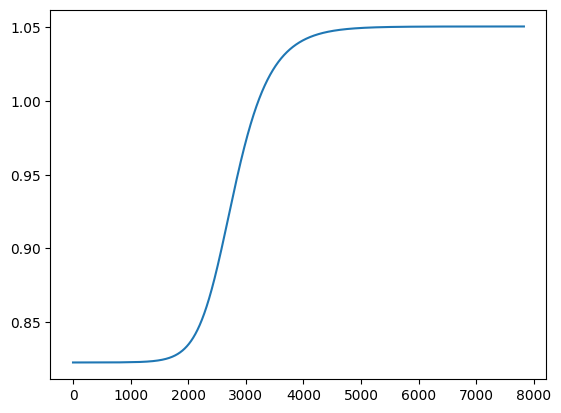

In [19]:
plt.plot([gm3.medians[i][0] for i in range(len(gm3.medians))])

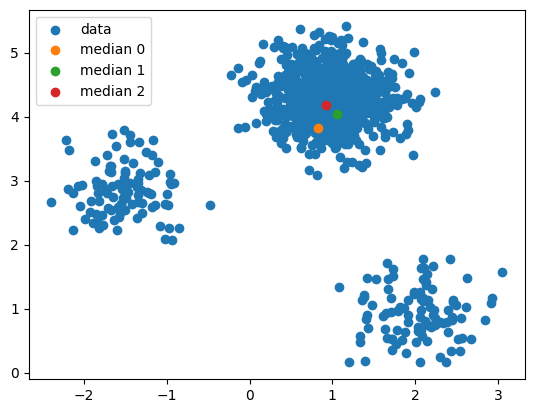

In [20]:
plot_data(C[:, :2], [gm3.medians[0][:2], gm3.medians[-1][:2], res_res[:2]], show_data=True)

In [30]:
plot_data(C[:, 2:4], [gm3.medians[0][2:4], gm3.medians[-1][2:4], res_res[2:4]], show_data=True)

ValueError: Required d<=3

In [31]:
plot_data(C[:, 3:], [gm3.medians[0][3:], gm3.medians[-1][3:], res_res[3:]], show_data=True)

ValueError: Required d<=3

In [23]:
medians = np.load("medians_result.npy")

In [24]:
testing = generate_data((1000, 5), 0.2)

In [27]:
opt = compute_geometric_median(torch.from_numpy(testing))

In [28]:
opt = torch.Tensor.numpy(opt.median)

In [37]:
1.25*calc_f(testing, opt)

3807.4372262628276

In [25]:
calc_f(testing, medians[0])

3862.5264418280804

In [26]:
calc_f(testing, medians[-1])

3839.2824902970588

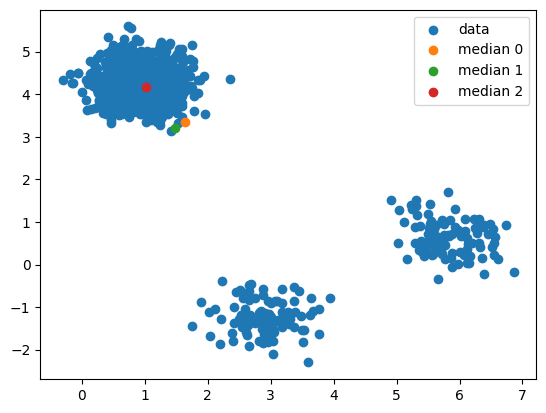

In [32]:
plot_data(testing[:, :2], [medians[0][:2], medians[-1][:2], opt[:2]], show_data=True)

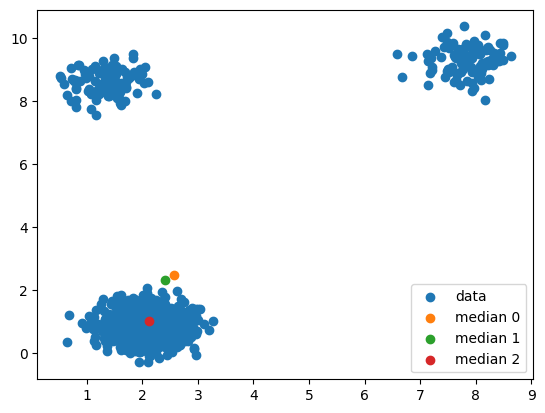

In [33]:
plot_data(testing[:, 2:4], [medians[0][2:4], medians[-1][2:4], opt[2:4]], show_data=True)

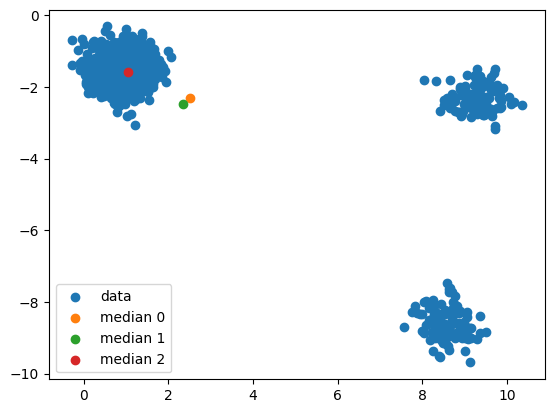

In [34]:
plot_data(testing[:, 3:], [medians[0][3:], medians[-1][3:], opt[3:]], show_data=True)

In [ ]:
# bestie
n, d = 1000000, 500
A = generate_data((n, d), 0.2)

In [ ]:
opt_out = compute_geometric_median(torch.from_numpy(A))